In [13]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pip install missingno
import missingno as msno
%pip install fancyimpute
from fancyimpute import IterativeImputer, KNN


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
# Load the dataset
path = '/workspaces/DS_ML_Gr_1.5/2_BaselineModel/merged_data_new.csv'

#Set all Nan as NA-values and knoen 0 as 0
merged_data = pd.read_csv(path, na_values=('-','NaN','','nan'))
merged_data['KielerWoche']= merged_data['KielerWoche'].fillna(0)
merged_data['Schneehoehe']= merged_data['Schneehoehe'].fillna(0)

merged_data['Faehrverkaehr']=pd.to_numeric(merged_data['Faehrverkaehr'].str.replace('.', ''))
merged_data['Kreuzfahrverkehr']=merged_data['Kreuzfahrverkehr']*1000
df_merged_data = pd.DataFrame(merged_data)


print(df_merged_data.head())

        Datum  Inflationsrate  Heimspiel  Weihnachtsmarkt  Markt  \
0  2013-07-01            1.53        0.0              0.0    0.0   
1  2013-07-01            1.53        0.0              0.0    0.0   
2  2013-07-01            1.53        0.0              0.0    0.0   
3  2013-07-01            1.53        0.0              0.0    0.0   
4  2013-07-01            1.53        0.0              0.0    0.0   

   Faehrverkaehr  Kreuzfahrverkehr  Temperatur  Monat Jahreszeit  ...  \
0      1576718.0          419447.0     17.8375      7     Sommer  ...   
1      1576718.0          419447.0     17.8375      7     Sommer  ...   
2      1576718.0          419447.0     17.8375      7     Sommer  ...   
3      1576718.0          419447.0     17.8375      7     Sommer  ...   
4      1576718.0          419447.0     17.8375      7     Sommer  ...   

   Sonnenaufgang  Sonnenuntergang  Tageslaenge  Niederschlag  \
0        4:50:12         21:56:46     17:06:34           0.3   
1        4:50:12        

### Visualization of Missing Data

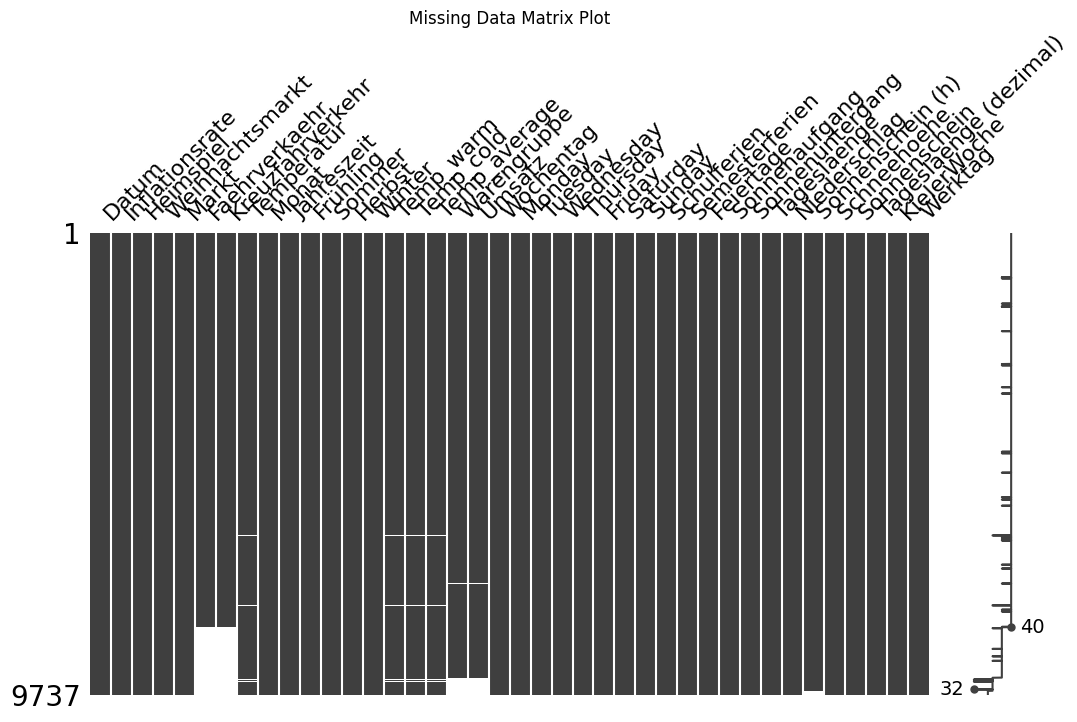

In [15]:
# Matrix plot of missing data
msno.matrix(df_merged_data, figsize=(12, 6))
plt.title('Missing Data Matrix Plot')
plt.show()

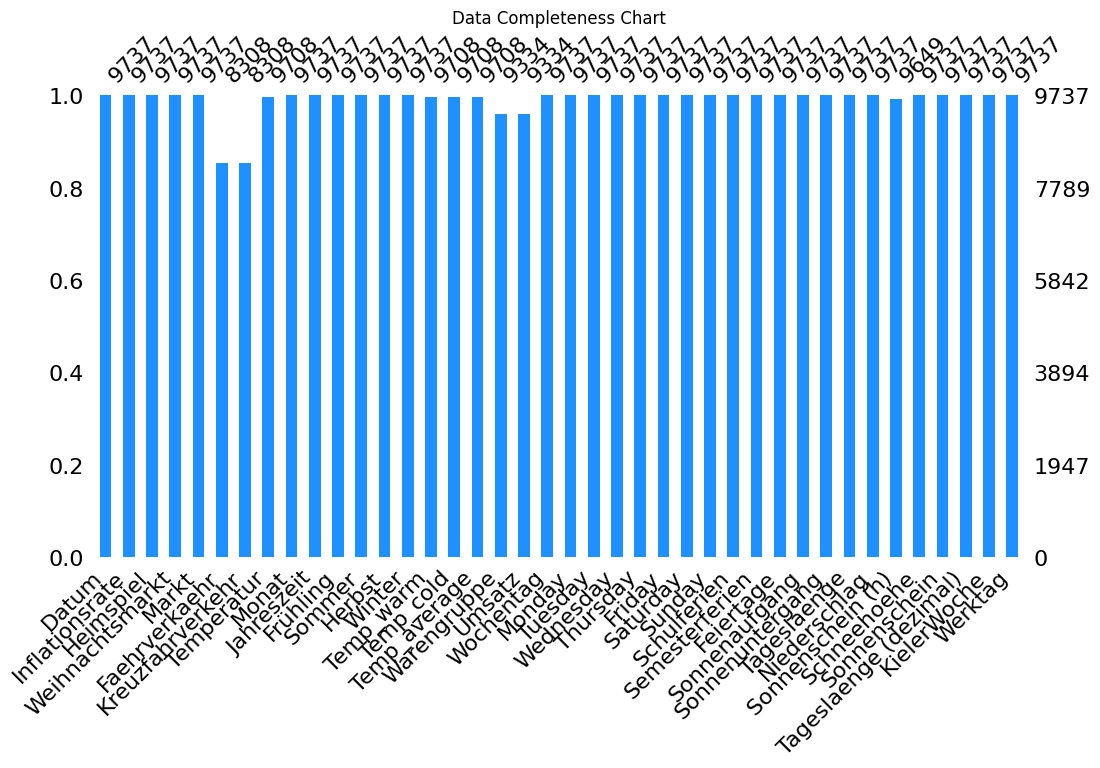

In [16]:
# Bar plot of complete data
msno.bar(df_merged_data, color="dodgerblue", figsize=(12, 6))
plt.title('Data Completeness Chart')
plt.show()

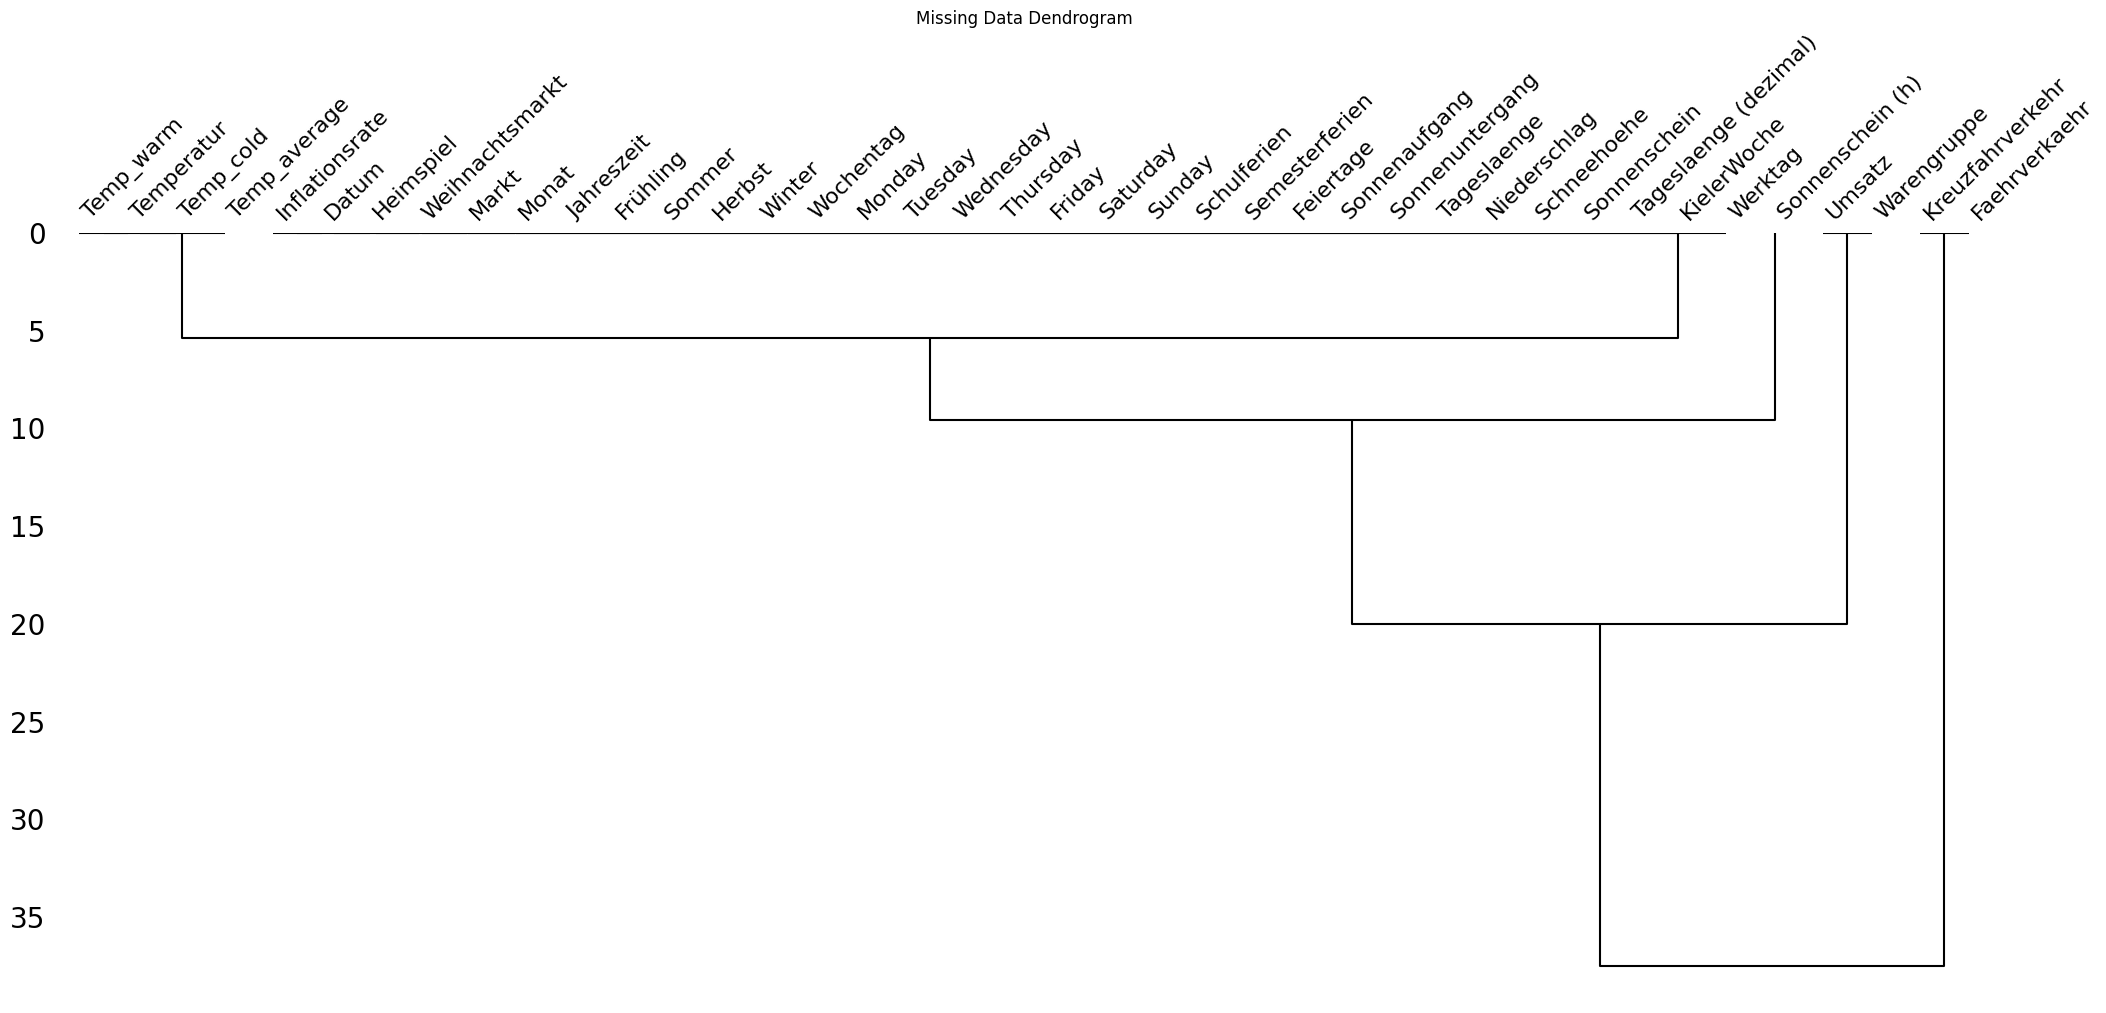

In [17]:

# Dendrogram to visualize the correlation of missingness between variables
msno.dendrogram(df_merged_data)
plt.title('Missing Data Dendrogram')
plt.show()

### Imputation of Missing Data

In [18]:
# Create a mask for the imputed values
#drop coloums with non-numerical values and Umsatz to not impute data there yet
df_merged_data_reduced=df_merged_data.drop([ 'Datum','Jahreszeit', 'Wochentag', 'Sonnenaufgang', 'Sonnenuntergang', 'Tageslaenge','Umsatz','Warengruppe','Temp_cold','Temp_warm','Temp_average'], axis=1)

mask = df_merged_data_reduced['Sonnenschein'].isna()  # mask for missing values in 'Ozone'

In [19]:
# KNN imputation
imputer_knn = KNN()
data_knn = pd.DataFrame(imputer_knn.fit_transform(df_merged_data_reduced), columns=df_merged_data_reduced.columns)


# Ergebnis als neue CSV-Datei speichern
df_merged_data_knn=data_knn.assign(Datum=df_merged_data['Datum'],Umsatz=df_merged_data['Umsatz'],Warengruppe=df_merged_data['Warengruppe'],Temp_average=df_merged_data['Temp_average'],Temp_cold=df_merged_data['Temp_cold'],Temp_warm=df_merged_data['Temp_warm'], Tageslaenge=df_merged_data['Tageslaenge'] )
df_merged_data_knn['Temp_average']= df_merged_data_knn['Temp_average'].fillna(0)
df_merged_data_knn['Temp_warm']= df_merged_data_knn['Temp_warm'].fillna(0)
df_merged_data_knn['Temp_cold']= df_merged_data_knn['Temp_cold'].fillna(0)
#print(df_merged_data_knn.head())

df_merged_data_knn.to_csv("/workspaces/DS_ML_Gr_1.5/3_Neuronal_Model/Imputed_Data_KNN.csv", index=False)


Imputing row 1/9737 with 0 missing, elapsed time: 13.662
Imputing row 101/9737 with 0 missing, elapsed time: 13.663
Imputing row 201/9737 with 0 missing, elapsed time: 13.663
Imputing row 301/9737 with 0 missing, elapsed time: 13.663
Imputing row 401/9737 with 0 missing, elapsed time: 13.663
Imputing row 501/9737 with 0 missing, elapsed time: 13.663
Imputing row 601/9737 with 0 missing, elapsed time: 13.664
Imputing row 701/9737 with 0 missing, elapsed time: 13.664
Imputing row 801/9737 with 0 missing, elapsed time: 13.664
Imputing row 901/9737 with 0 missing, elapsed time: 13.664
Imputing row 1001/9737 with 0 missing, elapsed time: 13.664
Imputing row 1101/9737 with 0 missing, elapsed time: 13.664
Imputing row 1201/9737 with 0 missing, elapsed time: 13.665
Imputing row 1301/9737 with 0 missing, elapsed time: 13.665
Imputing row 1401/9737 with 0 missing, elapsed time: 13.665
Imputing row 1501/9737 with 0 missing, elapsed time: 13.665
Imputing row 1601/9737 with 0 missing, elapsed time:

      Inflationsrate  Heimspiel  Weihnachtsmarkt  Markt  Faehrverkaehr  \
9732            1.43        1.0              0.0    0.0   1.576718e+06   
9733            1.43        0.0              0.0    0.0   1.623741e+06   
9734            1.43        0.0              0.0    0.0   1.599375e+06   
9735            1.43        0.0              0.0    0.0   1.599375e+06   
9736            1.43        0.0              0.0    0.0   1.576718e+06   

      Kreuzfahrverkehr  Temperatur  Monat  Frühling  Sommer  ...  \
9732     419447.006618     23.5375    7.0       0.0     1.0  ...   
9733     412164.984367     23.3500    7.0       0.0     1.0  ...   
9734     485497.014662     25.2500    7.0       0.0     1.0  ...   
9735     485497.000000     20.7375    7.0       0.0     1.0  ...   
9736     419447.005983     20.4500    7.0       0.0     1.0  ...   

      Tageslaenge (dezimal)  KielerWoche  Werktag       Datum  Umsatz  \
9732                  16.08          0.0      0.0  2019-07-27     NaN   


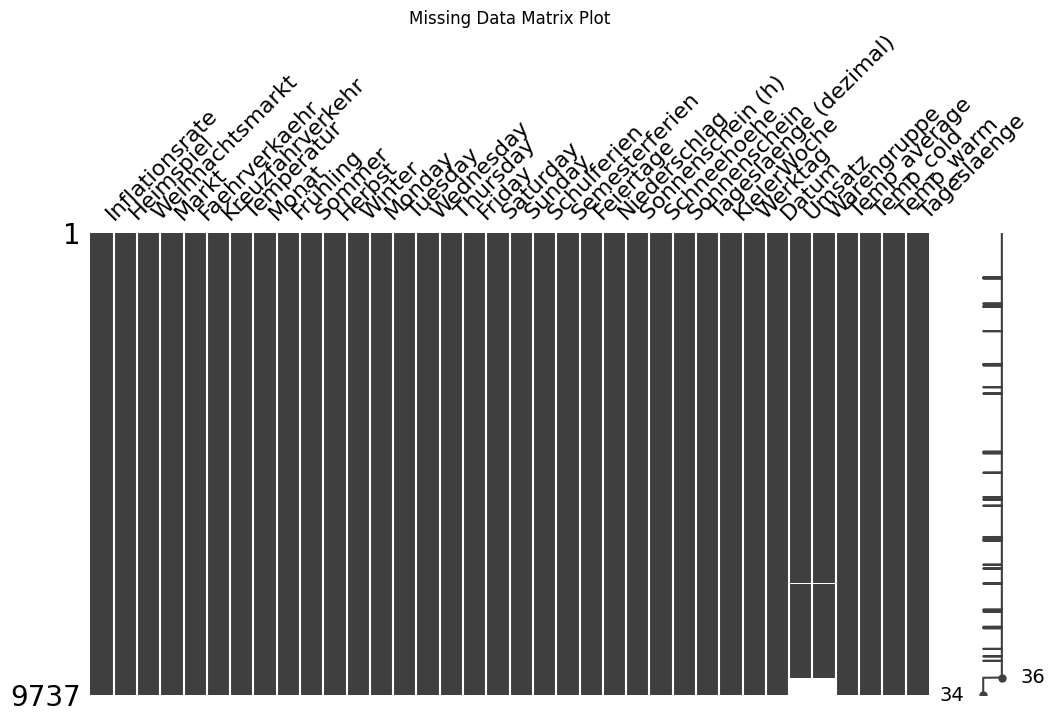

In [20]:
# Iterative Robust Model Imputation (IRMI)
imputer_irmi = IterativeImputer()
data_irmi = pd.DataFrame(imputer_irmi.fit_transform(df_merged_data_reduced), columns=df_merged_data_reduced.columns)


# Ergebnis als neue CSV-Datei speichern
df_merged_data_irmi=data_irmi.assign(Datum=df_merged_data['Datum'],Umsatz=df_merged_data['Umsatz'],Warengruppe=df_merged_data['Warengruppe'],Temp_average=df_merged_data['Temp_average'],Temp_cold=df_merged_data['Temp_cold'],Temp_warm=df_merged_data['Temp_warm'], Tageslaenge=df_merged_data['Tageslaenge'] )
df_merged_data_irmi['Temp_average']= df_merged_data_irmi['Temp_average'].fillna(0)
df_merged_data_irmi['Temp_warm']= df_merged_data_irmi['Temp_warm'].fillna(0)
df_merged_data_irmi['Temp_cold']= df_merged_data_irmi['Temp_cold'].fillna(0)
print(df_merged_data_knn.tail())
msno.matrix(df_merged_data_irmi, figsize=(12, 6))
plt.title('Missing Data Matrix Plot')
plt.show()

df_merged_data_irmi.to_csv("/workspaces/DS_ML_Gr_1.5/3_Neuronal_Model/Imputed_Data_IRMI.csv", index=False)

### Visualization of Imputed Data

In [21]:
def plot_scatter_with_imputation(original_data, imputed_data, x, y, mask, title='Scatter Plot', xlabel='X-axis', ylabel='Y-axis'):
    plt.figure(figsize=(10, 6))
    
    # Overall min and max for both axes
    x_min = -0.02
    x_max = 1
    y_min = -5
    y_max = 40
    
    # Plot points
    sns.scatterplot(x=original_data.loc[~mask, x], y=original_data.loc[~mask, y], color='blue', label='Original')
    sns.scatterplot(x=imputed_data.loc[mask, x], y=imputed_data.loc[mask, y], color='red', label='Imputed')
    
    # Set consistent axis limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()


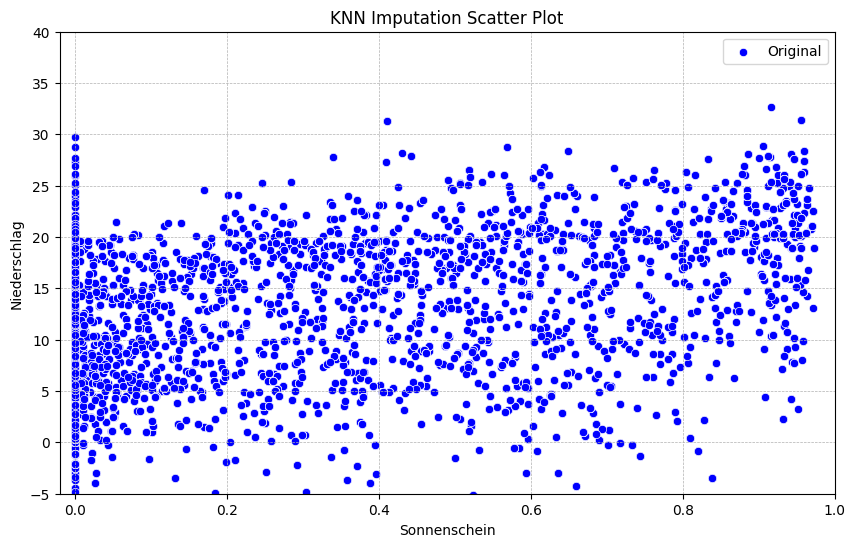

In [22]:
# Plotting results for KNN imputation
plot_scatter_with_imputation(df_merged_data_reduced, data_knn, 'Sonnenschein', 'Temperatur', mask, 'KNN Imputation Scatter Plot','Sonnenschein','Niederschlag')


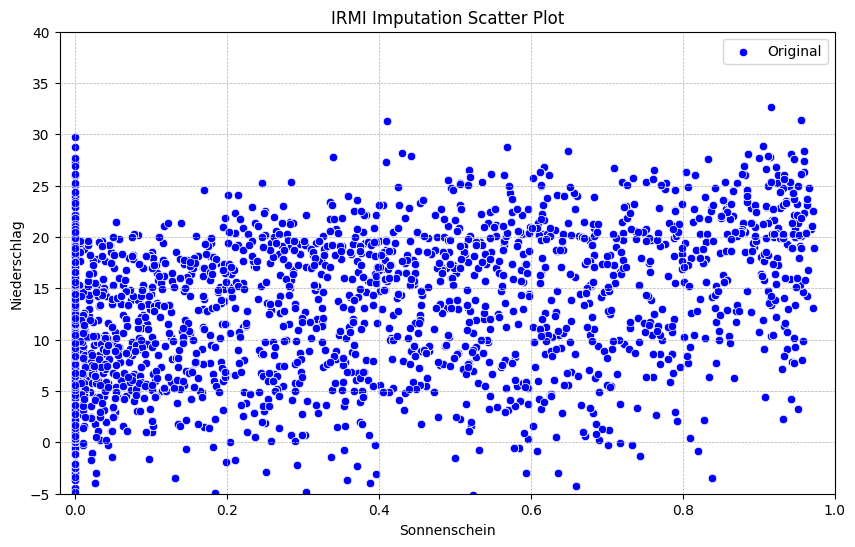

In [23]:
# Plotting results for IRMI imputation
plot_scatter_with_imputation(df_merged_data_reduced, data_irmi, 'Sonnenschein', 'Temperatur', mask, 'IRMI Imputation Scatter Plot','Sonnenschein','Niederschlag')

### Correlation Analysis

In [24]:
print("Correlation in original data:", df_merged_data_reduced['Niederschlag'].corr(df_merged_data_reduced['Temperatur'], method='pearson'))
print("Correlation after KNN imputation:", data_knn['Niederschlag'].corr(data_knn['Temperatur']))
print("Correlation after IRMI:", data_irmi['Niederschlag'].corr(data_irmi['Temperatur']))

Correlation in original data: -0.02291858263423717
Correlation after KNN imputation: -0.01968739248551477
Correlation after IRMI: -0.019432367255027224
